# Importar funciones

In [ ]:
import pandas as pd
import glob
import numpy as np
import pickle


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.activations import sigmoid, softmax, relu, tanh
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2, l1_l2
from sklearn.utils import class_weight
from sklearn.metrics  import confusion_matrix, accuracy_score


# Cargar Datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving B1_2015.csv to B1_2015.csv
Saving B1_2016.csv to B1_2016.csv
Saving B1_2017.csv to B1_2017.csv
Saving B1_2018.csv to B1_2018.csv
Saving D1_2015.csv to D1_2015.csv
Saving D1_2016.csv to D1_2016.csv
Saving D1_2017.csv to D1_2017.csv
Saving D1_2018.csv to D1_2018.csv
Saving D2_2015.csv to D2_2015.csv
Saving D2_2016.csv to D2_2016.csv
Saving D2_2017.csv to D2_2017.csv
Saving D2_2018.csv to D2_2018.csv
Saving E0_2015.csv to E0_2015.csv
Saving E0_2016.csv to E0_2016.csv
Saving E0_2017.csv to E0_2017.csv
Saving E0_2018.csv to E0_2018.csv
Saving E1_2015.csv to E1_2015.csv
Saving E1_2016.csv to E1_2016.csv
Saving E1_2017.csv to E1_2017.csv
Saving E1_2018.csv to E1_2018.csv
Saving E2_2015.csv to E2_2015.csv
Saving E2_2016.csv to E2_2016.csv
Saving E2_2017.csv to E2_2017.csv
Saving E2_2018.csv to E2_2018.csv
Saving E3_2015.csv to E3_2015.csv
Saving E3_2016.csv to E3_2016.csv
Saving E3_2017.csv to E3_2017.csv
Saving E3_2018.csv to E3_2018.csv
Saving F1_2015.csv to F1_2015.csv
Saving F1_2016

In [ ]:

# Obtener la dirección de todos los archivos .CSV del path
path = r'/content' # use your path
#path = r'gdrive/My Drive/Data' # use your path
all_files = glob.glob(path + "/*.csv")

# Leer los archivos .CSV encontrados en all_files
li = []
for filename in all_files:
    df = pd.read_csv(filename,encoding = "ISO-8859-1",usecols = ['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG','FTAG','FTR','WHH','WHD','WHA'])
    li.append(df)


In [ ]:
len(all_files)

71

# Funciones

In [ ]:

def numberOfNonNans(data):
    count = 0
    for i in data:
        if not np.isnan(i):
            count += 1
    return count 

In [ ]:
def figure(History, legend):
  ####################### PLOT TRAINING VS VALIDATION ######################
  ########## Accuracy ###########
  acc = History.history['weighted_acc']
  val_acc = History.history['val_weighted_acc']
  loss = History.history['loss']
  val_loss = History.history['val_loss']

  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.grid()
  plt.show()

  ########## Loss ###########
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  try:
    loss_no_reg = History.history['weighted_categorical_crossentropy']
    val_loss_no_reg = History.history['val_weighted_categorical_crossentropy']
    plt.plot(loss_no_reg)
    plt.plot(val_loss_no_reg)
    plt.legend(legend + [legend[0]+' sin reg', legend[1]+' sin reg'], loc='upper left')
  except:
    plt.legend(legend, loc='upper left')

  plt.grid()
  plt.show()

In [ ]:
def a_puntos_L(result):
  sum = 0
  for i in range(len(result)):
    if result[i]=='H':
      sum = sum + 3
    elif result[i]=='D':
      sum = sum + 1
  return sum

def a_puntos_V(result):
  sum = 0
  for i in range(len(result)):
    if result[i]=='A':
      sum = sum + 3
    elif result[i]=='D':
      sum = sum + 1
  return sum

# Extraer features

In [ ]:
partidos = 10

data_x = []
data_y = []
lista_Div = []
lista_Date = []
lista_HomeTeam = []
lista_AwayTeam = []
lista_FTHG = []
lista_FTAG = []
lista_FTR = []
lista_WHH = []
lista_WHD = []
lista_WHA = []
lista_Datos = []
lista_Weights = []

n = 1
for fixture in li:

  Goles_L = {}
  Goles_V = {}
  Result_L = {}
  Result_V = {}

  print(n)
  n = n + 1
  for i in range(len(fixture)):
    EquipoL = fixture.iloc[i]['HomeTeam']
    EquipoV = fixture.iloc[i]['AwayTeam']
    
    #if (len(Goles_L.get(EquipoL, [])) >=5) & (len(Goles_V.get(EquipoV, [])) >=5)&(len(Goles_L.get(EquipoV, [])) >=5) & (len(Goles_V.get(EquipoL, [])) >=5) & (fixture.iloc[i]['WHH']  == fixture.iloc[i]['WHH'] ):
    if (len(Goles_L.get(EquipoL, [])) >=partidos) & (len(Goles_V.get(EquipoV, [])) >=partidos)&(len(Goles_L.get(EquipoV, [])) >=partidos) & (len(Goles_V.get(EquipoL, [])) >=partidos) & (fixture.iloc[i]['HomeTeam']  == fixture.iloc[i]['HomeTeam'] ) & (fixture.iloc[i]['WHH']>=1.6) & (fixture.iloc[i]['WHA']>=1.6): 
      lista_Div.append( fixture.iloc[i]['Div'] )
      lista_Date.append( fixture.iloc[i]['Date'] )
      lista_HomeTeam.append( fixture.iloc[i]['HomeTeam'] )
      lista_AwayTeam.append( fixture.iloc[i]['AwayTeam'] )
      lista_FTHG.append( fixture.iloc[i]['FTHG'] )
      lista_FTAG.append( fixture.iloc[i]['FTAG'] )
      lista_FTR.append( fixture.iloc[i]['FTR'] )
      lista_WHH.append( fixture.iloc[i]['WHH'] )
      lista_WHD.append( fixture.iloc[i]['WHD'] )
      lista_WHA.append( fixture.iloc[i]['WHA'] )
      lista_Datos.append( fixture.iloc[i] )
      if fixture.iloc[i]['FTR'] == 'H':
        lista_Weights.append(fixture.iloc[i]['WHH'] )
      elif fixture.iloc[i]['FTR'] == 'D':
        lista_Weights.append(fixture.iloc[i]['WHD'] )
      elif fixture.iloc[i]['FTR'] == 'A':
        lista_Weights.append(fixture.iloc[i]['WHA'] )


      rf = fixture.iloc[i]['FTR']
      if rf == 'H':
        data_y.append(0)
      elif rf == 'D':
        data_y.append(1)
      elif rf == 'A':
        data_y.append(2)
      else:
        print('ERROR')
        
      pll1 = a_puntos_L( Result_L[EquipoL][-1:] )/1/3 # puntos de local del equipo L
      pvv1 = a_puntos_V( Result_V[EquipoV][-1:] )/1/3  # puntos de visita del equipo v
      pvl1 = a_puntos_V( Result_V[EquipoL][-1:] )/1/3 # puntos de visita del equipo L
      plv1 = a_puntos_L( Result_L[EquipoV][-1:] )/1/3 # puntos de local del equipo V
      
      pll3 = a_puntos_L( Result_L[EquipoL][-3:] )/3/3 # puntos de local del equipo L
      pvv3 = a_puntos_V( Result_V[EquipoV][-3:] )/3/3  # puntos de visita del equipo v
      pvl3 = a_puntos_V( Result_V[EquipoL][-3:] )/3/3 # puntos de visita del equipo L
      plv3 = a_puntos_L( Result_L[EquipoV][-3:] )/3/3 # puntos de local del equipo V
      
      pll = a_puntos_L( Result_L[EquipoL][-partidos:] )/partidos/3 # puntos de local del equipo L
      pvv = a_puntos_V( Result_V[EquipoV][-partidos:] )/partidos/3  # puntos de visita del equipo v
      pvl = a_puntos_V( Result_V[EquipoL][-partidos:] )/partidos/3 # puntos de visita del equipo L
      plv = a_puntos_L( Result_L[EquipoV][-partidos:] )/partidos/3 # puntos de local del equipo V
      plg = (pvl + pll)/2  # puntos todos los partidos del equipoL
      pvg = (plv + pvv)/2 # puntos todos los partidos del equipoV

      gll1 = np.mean( Goles_L[EquipoL][-1:] ) # ultimos goles de local el equipoL
      gvv1 = np.mean( Goles_V[EquipoV][-1:] ) # ultimos goles de visita el equipoV
      glv1 = np.mean( Goles_L[EquipoV][-1:] ) # ultimos goles de local el equipoV
      gvl1 = np.mean( Goles_V[EquipoL][-1:] ) # ultimos goles de visita el equipoL
      
      gll3 = np.mean( Goles_L[EquipoL][-3:] ) # ultimos goles de local el equipoL
      gvv3 = np.mean( Goles_V[EquipoV][-3:] ) # ultimos goles de visita el equipoV
      glv3 = np.mean( Goles_L[EquipoV][-3:] ) # ultimos goles de local el equipoV
      gvl3 = np.mean( Goles_V[EquipoL][-3:] ) # ultimos goles de visita el equipoL
      
      gll = np.mean( Goles_L[EquipoL][-partidos:] ) # ultimos goles de local el equipoL
      gvv = np.mean( Goles_V[EquipoV][-partidos:] ) # ultimos goles de visita el equipoV
      glv = np.mean( Goles_L[EquipoV][-partidos:] ) # ultimos goles de local el equipoV
      gvl = np.mean( Goles_V[EquipoL][-partidos:] ) # ultimos goles de visita el equipoL
      ggl = (gll + gvl)/2 # ultimos goles en general el equipoL
      ggv = (glv + gvv)/2 # ultimos goles en general el equipoV
      
      nvll = np.sum([1 for a in Result_L[EquipoL][-partidos:] if a == 'H' ])
      nell = np.sum([1 for a in Result_L[EquipoL][-partidos:] if a == 'D' ])
      ndll = np.sum([1 for a in Result_L[EquipoL][-partidos:] if a == 'A' ])
      nvvv = np.sum([1 for a in Result_V[EquipoV][-partidos:] if a == 'A' ])
      nevv = np.sum([1 for a in Result_V[EquipoV][-partidos:] if a == 'D' ])
      ndvv = np.sum([1 for a in Result_V[EquipoV][-partidos:] if a == 'H' ])
      nvlv = np.sum([1 for a in Result_L[EquipoV][-partidos:] if a == 'H' ])
      nelv = np.sum([1 for a in Result_L[EquipoV][-partidos:] if a == 'D' ])
      ndlv = np.sum([1 for a in Result_L[EquipoV][-partidos:] if a == 'A' ])
      nvvl = np.sum([1 for a in Result_V[EquipoL][-partidos:] if a == 'A' ])
      nevl = np.sum([1 for a in Result_V[EquipoL][-partidos:] if a == 'D' ])
      ndvl = np.sum([1 for a in Result_V[EquipoL][-partidos:] if a == 'H' ])

      nvgl = nvll + nvvl
      negl = nell + nevl
      ndgl = ndll + ndvl
      nvgv = nvvv + nvlv
      negv = nevv + nelv
      ndgv = ndvv + ndlv
      
      data_x.append([ pll1, pvv1, pvl1, plv1, gll1, gvv1, glv1, gvl1, pll3, pvv3, pvl3, plv3, gll3, gvv3, glv3, gvl3, pll, pvv, plg, pvg, plv, pvl, gll, gvv, ggl, ggv, glv, gvl, nvll, nell, ndll, nvvv, nevv, ndvv, nvgl, negl, ndgl, nvgv, negv, ndgv, nvlv, nelv, ndlv, nvvl, nevl, ndvl ])
      #data_x.append([gll, gvv, glv, gvl, nvll, nell, ndll, nvvv, nevv, ndvv, nvlv, nelv, ndlv, nvvl, nevl, ndvl ])
    
    if fixture.iloc[i]['HomeTeam']  == fixture.iloc[i]['HomeTeam']:
      Goles_L[EquipoL] = Goles_L.get(EquipoL, []) + [fixture.iloc[i]['FTHG']]
      Goles_V[EquipoV] = Goles_V.get(EquipoV, []) + [fixture.iloc[i]['FTAG']]
      Result_L[EquipoL] = Result_L.get(EquipoL, []) + [fixture.iloc[i]['FTR']]
      Result_V[EquipoV] = Result_V.get(EquipoV, []) + [fixture.iloc[i]['FTR']]





1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


## Pre-procesar datos

In [ ]:
data_x = np.asarray(data_x)
data_y = np.asarray(data_y)

lista_Div = np.asarray(lista_Div)
lista_Date = np.asarray(lista_Date)
lista_HomeTeam = np.asarray(lista_HomeTeam)
lista_AwayTeam = np.asarray(lista_AwayTeam)
lista_FTHG = np.asarray(lista_FTHG)
lista_FTAG = np.asarray(lista_FTAG)
lista_FTR = np.asarray(lista_FTR)
lista_WHH = np.asarray(lista_WHH)
lista_WHD = np.asarray(lista_WHD)
lista_WHA = np.asarray(lista_WHA)
lista_Weights = np.asarray(lista_Weights)


In [ ]:
TRAIN_x_orig, test_x_orig, TRAIN_y, test_y, = train_test_split(data_x, data_y, test_size = 0.2, random_state = 42)

TRAIN_Div, test_Div, = train_test_split(lista_Div, test_size = 0.2, random_state = 42)
TRAIN_Date, test_Date, = train_test_split(lista_Date, test_size = 0.2, random_state = 42)
TRAIN_HomeTeam, test_HomeTeam, = train_test_split(lista_HomeTeam, test_size = 0.2, random_state = 42)
TRAIN_AwayTeam, test_AwayTeam, = train_test_split(lista_AwayTeam, test_size = 0.2, random_state = 42)
TRAIN_FTHG, test_FTHG, = train_test_split(lista_FTHG, test_size = 0.2, random_state = 42)
TRAIN_FTAG, test_FTAG, = train_test_split(lista_FTAG, test_size = 0.2, random_state = 42)
TRAIN_FTR, test_FTR, = train_test_split(lista_FTR, test_size = 0.2, random_state = 42)
TRAIN_WHH, test_WHH, = train_test_split(lista_WHH, test_size = 0.2, random_state = 42)
TRAIN_WHD, test_WHD, = train_test_split(lista_WHD, test_size = 0.2, random_state = 42)
TRAIN_WHA, test_WHA, = train_test_split(lista_WHA, test_size = 0.2, random_state = 42)
TRAIN_Weights, test_Weights, = train_test_split(lista_Weights, test_size = 0.2, random_state = 42)



In [ ]:
scaler = MinMaxScaler()
scaler.fit(TRAIN_x_orig)
TRAIN_x = scaler.transform(TRAIN_x_orig)
test_x = scaler.transform(test_x_orig)
#TRAIN_x = TRAIN_x_orig
#test_x = test_x_orig

In [ ]:
# Saving the objects:
with open('objs.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(scaler, f)

In [ ]:
train_x, valid_x, train_y, valid_y, = train_test_split(TRAIN_x, TRAIN_y, test_size = 0.2, random_state = 42)

train_Div, valid_Div, = train_test_split(TRAIN_Div, test_size = 0.2, random_state = 42)
train_Date, valid_Date, = train_test_split(TRAIN_Date, test_size = 0.2, random_state = 42)
train_HomeTeam, valid_HomeTeam, = train_test_split(TRAIN_HomeTeam, test_size = 0.2, random_state = 42)
train_AwayTeam, valid_AwayTeam, = train_test_split(TRAIN_AwayTeam, test_size = 0.2, random_state = 42)
train_FTHG, valid_FTHG, = train_test_split(TRAIN_FTHG, test_size = 0.2, random_state = 42)
train_FTAG, valid_FTAG, = train_test_split(TRAIN_FTAG, test_size = 0.2, random_state = 42)
train_FTR, valid_FTR, = train_test_split(TRAIN_FTR, test_size = 0.2, random_state = 42)
train_WHH, valid_WHH, = train_test_split(TRAIN_WHH, test_size = 0.2, random_state = 42)
train_WHD, valid_WHD, = train_test_split(TRAIN_WHD, test_size = 0.2, random_state = 42)
train_WHA, valid_WHA, = train_test_split(TRAIN_WHA, test_size = 0.2, random_state = 42)
train_Weights, valid_Weights, = train_test_split(TRAIN_Weights, test_size = 0.2, random_state = 42)


In [ ]:
# Resumen de dimensiones
print ("TRAIN_x shape: " + str(TRAIN_x.shape))
print ("TRAIN_y shape: " + str(TRAIN_y.shape))
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("valid_x shape: " + str(valid_x.shape))
print ("valid_y shape: " + str(valid_y.shape))
print ("test_x shape:  " + str(test_x.shape))
print ("test_y shape:  " + str(test_y.shape))

TRAIN_x shape: (8042, 46)
TRAIN_y shape: (8042,)
train_x shape: (6433, 46)
train_y shape: (6433,)
valid_x shape: (1609, 46)
valid_y shape: (1609,)
test_x shape:  (2011, 46)
test_y shape:  (2011,)


In [ ]:
print('clase 0: ',np.sum(TRAIN_y==0) )
print('clase 1: ',np.sum(TRAIN_y==1) )
print('clase 2: ', np.sum(TRAIN_y==2) )

clase 0:  3383
clase 1:  2246
clase 2:  2413


In [ ]:
print('clase 0: ',np.sum(train_y==0) )
print('clase 1: ',np.sum(train_y==1) )
print('clase 2: ',np.sum(train_y==2) )

clase 0:  2711
clase 1:  1807
clase 2:  1915


In [ ]:
print('clase 0: ',np.sum(valid_y==0) )
print('clase 1: ',np.sum(valid_y==1) )
print('clase 2: ',np.sum(valid_y==2) )

clase 0:  672
clase 1:  439
clase 2:  498


In [ ]:
print('clase 0: ',np.sum(test_y==0) )
print('clase 1: ',np.sum(test_y==1) )
print('clase 2: ',np.sum(test_y==2) )

clase 0:  828
clase 1:  562
clase 2:  621


In [ ]:
def transfor4(y_cat, alpha):
  transformed = y_cat*(1-alpha) + (alpha)*np.concatenate((np.zeros((y_cat.shape[0],y_cat.shape[1]-1)),np.ones((y_cat.shape[0], 1))), axis = 1 )
  return transformed

In [ ]:
#Converts a class vector
alpha = 0
Clases = 3

if Clases ==4:
  TRAIN_y_cat = transfor4(to_categorical(TRAIN_y,4), alpha=alpha)
  train_y_cat = transfor4(to_categorical(train_y,4), alpha=alpha)
  valid_y_cat = transfor4(to_categorical(valid_y,4), alpha=alpha)
  test_y_cat = transfor4(to_categorical(test_y,4), alpha=alpha)
elif Clases ==3:
  TRAIN_y_cat = to_categorical(TRAIN_y)
  train_y_cat = to_categorical(train_y)
  valid_y_cat = to_categorical(valid_y)
  test_y_cat = to_categorical(test_y)


print ("TRAIN_y_cat shape: " + str(TRAIN_y_cat.shape))
print ("train_y_cat shape: " + str(train_y_cat.shape))
print ("valid_y_cat shape: " + str(valid_y_cat.shape))
print ("test_y_cat shape:  " + str(test_y_cat.shape))

TRAIN_y_cat shape: (8042, 3)
train_y_cat shape: (6433, 3)
valid_y_cat shape: (1609, 3)
test_y_cat shape:  (2011, 3)


#Train

In [ ]:
class_weights_train = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_y),
                                                 train_y)

weights_train = {}
for i in range(len(class_weights_train)):
  weights_train[i] = class_weights_train[i]

#weights_train[1]=2


In [ ]:
# Creación del modelo
L2 = 0
model = Sequential([
                    Input(shape=[train_x.shape[-1]]),
                    #Dense(units=Clases, input_shape= [train_x.shape[-1]], activation = softmax, kernel_regularizer= l2(0.001) ),
                    #Dropout(0.25),
                    #Dense(units=10, activation = relu),
                    #Dropout(0.25),
                    Dense(units=Clases, activation = softmax)
                    ])

# Arquitectura del modelo
model.summary()
Wsave = model.get_weights()


Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 3)                 141       
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_Weights = (train_y==0)*class_weights_train[0]+(train_y==1)*class_weights_train[1] + (train_y==2)*class_weights_train[2]
#train_Weights = (train_y==0) + (train_y==1) + (train_y==2)
#train_Weights = (train_y==0) + (train_y==1)*0 + (train_y==2)

#valid_Weights = (valid_y==0) + (valid_y==1)*0 + (valid_y==2)
valid_Weights = (valid_y==0)*class_weights_train[0]+(valid_y==1)*class_weights_train[1] + (valid_y==2)*class_weights_train[2]
#valid_Weights = (valid_y==0) + (valid_y==1) + (valid_y==2)


In [ ]:
learning_rate  = 0.0002
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=pathlearning_rate=learning_rate), loss= 'categorical_crossentropy',metrics=['acc', 'categorical_crossentropy'], weighted_metrics=['acc','categorical_crossentropy'])
# Early stopping
stopping = EarlyStopping(monitor='val_weighted_categorical_crossentropy',min_delta=0,mode='auto',patience=15, restore_best_weights=True)
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, sample_weight = train_Weights, epochs=250, batch_size=64, callbacks=[stopping], validation_data= (valid_x, valid_y_cat, valid_Weights))#, class_weight = weights_train)
#History = model.fit(train_x, train_y_cat, epochs=250, batch_size=64, callbacks=[stopping], validation_data= (valid_x, valid_y_cat), class_weight = weights_train)
#History = model.fit(train_x, train_y_cat, sample_weight = train_Weights/3, epochs=250, batch_size=64, callbacks=[stopping], validation_data= (valid_x, valid_y_cat, valid_Weights/3), class_weight = weights_train)
#History = model.fit(train_x, train_y_cat, epochs=250, batch_size=64, callbacks=[stopping], validation_data= (valid_x, valid_y_cat))


Epoch 1/250
101/101 [==============================] - 1s 9ms/step - loss: 1.1572 - acc: 0.3549 - categorical_crossentropy: 1.1394 - weighted_acc: 0.3454 - weighted_categorical_crossentropy: 1.1602 - val_loss: 1.1374 - val_acc: 0.3163 - val_categorical_crossentropy: 1.1274 - val_weighted_acc: 0.3117 - val_weighted_categorical_crossentropy: 1.1366
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.1169 - acc: 0.3604 - categorical_crossentropy: 1.1086 - weighted_acc: 0.3539 - weighted_categorical_crossentropy: 1.1162 - val_loss: 1.1232 - val_acc: 0.3132 - val_categorical_crossentropy: 1.1192 - val_weighted_acc: 0.3129 - val_weighted_categorical_crossentropy: 1.1225
Epoch 3/250
101/101 [==============================] - 0s 4ms/step - loss: 1.1080 - acc: 0.3480 - categorical_crossentropy: 1.1045 - weighted_acc: 0.3484 - weighted_categorical_crossentropy: 1.1069 - val_loss: 1.1198 - val_acc: 0.3250 - val_categorical_crossentropy: 1.1171 - val_weighted_acc: 0.3255 -

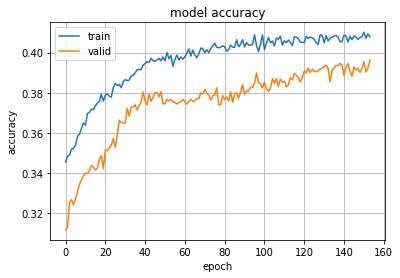

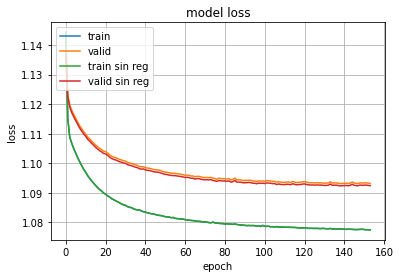

In [ ]:
figure(History,['train', 'valid'])

In [ ]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0, sample_weight = (train_y==0) +(train_y==1)*0 + (train_y==2))
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[0], Metricas[3]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0, sample_weight = (valid_y==0) +(valid_y==1)*0 + (valid_y==2))
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[0], Metricas[3]) )


train Loss: 0.7683, train Acc: 0.5052
valid Loss: 0.7913, valid Acc: 0.4761


In [ ]:
a = model.predict_classes(valid_x[model.predict(valid_x)[:,0]>0.46])
b = valid_y[model.predict(valid_x)[:,0]>0.46]
confusion_matrix(b, a)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[37,  0,  0],
       [19,  0,  0],
       [18,  0,  0]])

In [ ]:
a = model.predict_classes(valid_x[model.predict(valid_x)[:,2]>0.49])
b = valid_y[model.predict(valid_x)[:,2]>0.49]
confusion_matrix(b, a)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ 0,  0, 25],
       [ 0,  0, 19],
       [ 0,  0, 44]])

In [ ]:
confusion_matrix(train_y, model.predict_classes(train_x))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1337,  454,  920],
       [ 709,  376,  722],
       [ 623,  292, 1000]])

In [ ]:
a = confusion_matrix(valid_y, model.predict_classes(valid_x))
a

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[311, 110, 251],
       [181,  79, 179],
       [190,  60, 248]])

In [ ]:
(a[0,0] + a[2,2])/(a[0,0]+a[1,0]+a[2,0]+a[0,2]+a[1,2]+a[2,2])

0.41102941176470587

In [ ]:
a[0,0]/(a[0,0]+a[1,0]+a[2,0])

0.47480916030534354

In [ ]:
a[2,2]/(a[0,2]+a[1,2]+a[2,2])

0.3704819277108434

## Predicciones Prob L > T

In [ ]:
np.sum(model.predict_classes(valid_x)==0)/8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


154.125

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


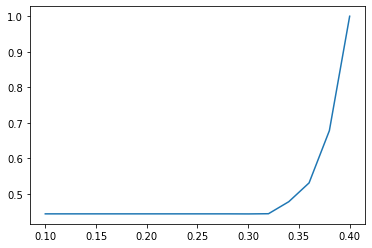

In [ ]:
list_acc= []
umbral = []
for t in range(10, 50, 2):
  T = t/100
  
  index_L_mayor_T = model.predict(valid_x)[:,0]>T
  try:
    Pred_L_mayor_T = model.predict_classes(valid_x[index_L_mayor_T])
    True_labels = valid_y[index_L_mayor_T]
    list_acc.append(accuracy_score( True_labels, Pred_L_mayor_T) )
    umbral.append(T)
  except:
    pass

plt.plot(umbral,list_acc)


## Predicciones L > T

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


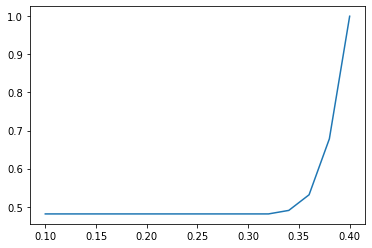

In [ ]:
list_acc= []
umbral = []
for t in range(10, 50, 2):
  T = t/100
  index_Pred_L = model.predict_classes(valid_x)==0
  try:
    index_Pred_L_mayor_T = model.predict(valid_x[index_Pred_L])[:,0]>T
    Pred_L_y_mayor_T = model.predict_classes(valid_x[index_Pred_L][index_Pred_L_mayor_T])
    True_labels = valid_y[index_Pred_L][index_Pred_L_mayor_T]
    list_acc.append(accuracy_score( True_labels, Pred_L_y_mayor_T) )
    umbral.append(T)
  except:
    pass

plt.plot(umbral,list_acc)


## Predicciones Prob V > T

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


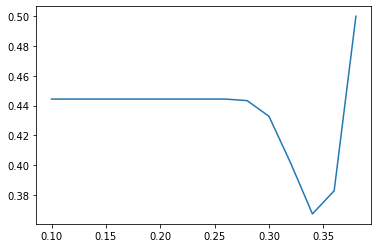

In [ ]:
list_acc= []
umbral = []
for t in range(10, 50, 2):
  T = t/100
  try:
    index_V_mayor_T = model.predict(valid_x)[:,2]>T
    Pred_V_mayor_T = model.predict_classes(valid_x[index_V_mayor_T])
    True_labels = valid_y[index_V_mayor_T]
    list_acc.append(accuracy_score( True_labels, Pred_V_mayor_T) )
    umbral.append(T)
  except:
    pass

plt.plot(umbral,list_acc)


## Predicciones L > T

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


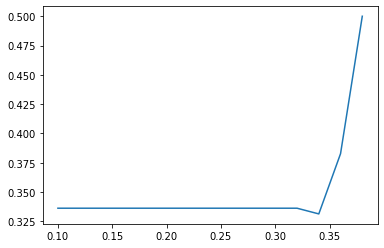

In [ ]:
list_acc= []
umbral = []
for t in range(10, 50, 2):
  T = t/100
  try:
    index_Pred_V = model.predict_classes(valid_x)==2
    index_Pred_V_mayor_T = model.predict(valid_x[index_Pred_V])[:,2]>T
    Pred_V_y_mayor_T = model.predict_classes(valid_x[index_Pred_V][index_Pred_V_mayor_T])
    True_labels = valid_y[index_Pred_V][index_Pred_V_mayor_T]
    list_acc.append(accuracy_score( True_labels, Pred_V_y_mayor_T) )
    umbral.append(T)
  except:
    pass

plt.plot(umbral,list_acc)


# encotnrar alpha

In [ ]:
np.mean(valid_WHH)*0.7393*3/(np.mean(valid_WHH)*0.7393+np.mean(valid_WHD)*1.2625+np.mean(valid_WHA)*1.1691)

0.5057473090069288

In [ ]:
np.mean(valid_WHD)*1.2625*3/(np.mean(valid_WHH)*0.7393+np.mean(valid_WHD)*1.2625+np.mean(valid_WHA)*1.1691)

1.215704060328639

In [ ]:
np.mean(valid_WHA)*1.1691*3/(np.mean(valid_WHH)*0.7393+np.mean(valid_WHD)*1.2625+np.mean(valid_WHA)*1.1691)

1.278548630664432

In [ ]:
#weights_train[1]=1.75
weights_train

{0: 0.7393339333933393, 1: 1.2625268982477713, 2: 1.1690862510674638}

In [ ]:
weights_train[0] = 0.7393339333933393
weights_train[1] = 1.2625268982477713
weights_train[2] = 1.1690862510674638

TRAIN_y_cat shape: (8042, 3)
train_y_cat shape: (6433, 3)
valid_y_cat shape: (1609, 3)
test_y_cat shape:  (2011, 3)
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 3)                 141       
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


TRAIN_y_cat shape: (8042, 3)
train_y_cat shape: (6433, 3)
valid_y_cat shape: (1609, 3)
test_y_cat shape:  (2011, 3)
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 3)                 141       
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


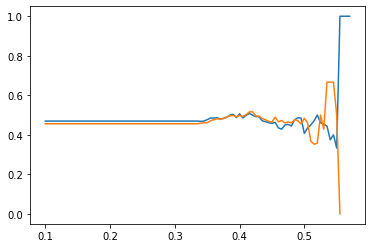

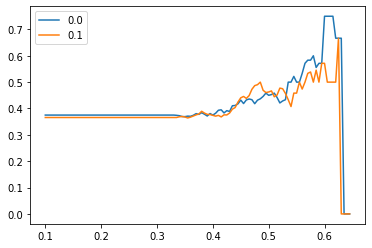

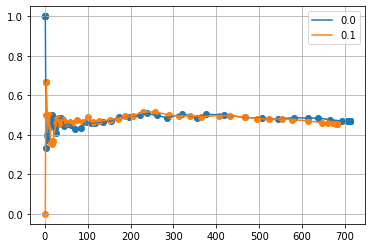

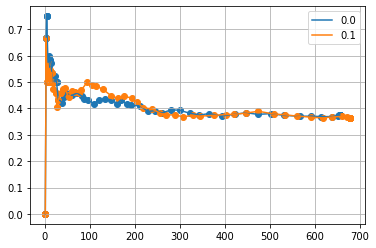

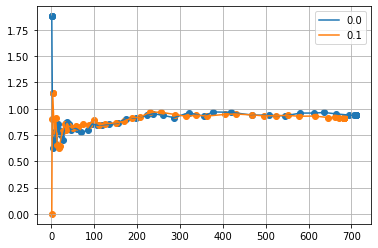

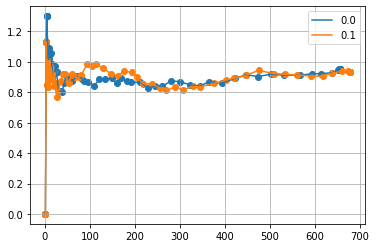

In [ ]:
#Converts a class vector
#alpha = 0
legend = []
acc_L = []
acc_V = []
n_L = []
n_V = []
Odds_V = []
Odds_L = []
Profit_L = []
Profit_V = []

for alpha_100 in range(0,20,10):
  alpha_test = alpha_100/100
  legend.append(str(alpha_test))
  
  alpha_test = 0

  if Clases ==4:
    TRAIN_y_cat = transfor4(to_categorical(TRAIN_y,4), alpha=alpha_test)
    train_y_cat = transfor4(to_categorical(train_y,4), alpha=alpha_test)
    valid_y_cat = transfor4(to_categorical(valid_y,4), alpha=alpha_test)
    test_y_cat = transfor4(to_categorical(test_y,4), alpha=alpha_test)
  elif Clases ==3:
    TRAIN_y_cat = to_categorical(TRAIN_y,3)
    train_y_cat = to_categorical(train_y,3)
    valid_y_cat = to_categorical(valid_y,3)
    test_y_cat = to_categorical(test_y,3)


  print ("TRAIN_y_cat shape: " + str(TRAIN_y_cat.shape))
  print ("train_y_cat shape: " + str(train_y_cat.shape))
  print ("valid_y_cat shape: " + str(valid_y_cat.shape))
  print ("test_y_cat shape:  " + str(test_y_cat.shape))

  # Creación del modelo
  L2 = 0
  model = Sequential([
                    Input(shape=[train_x.shape[-1]]),
                    #Dense(units=Clases, input_shape= [train_x.shape[-1]], activation = softmax, kernel_regularizer= l2(0.001) ),
                    #Dropout(0.25),
                    #Dense(units=10, activation = relu),
                    #Dropout(0.25),
                    Dense(units=Clases, activation = softmax)
                    ])

  # Arquitectura del modelo
  model.summary()


  # Definición del optimizador, función de pérdidas y métricas
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss= 'categorical_crossentropy',metrics=['acc', 'categorical_crossentropy'], weighted_metrics=['acc','categorical_crossentropy'])
  # Early stopping
  stopping = EarlyStopping(monitor='val_weighted_categorical_crossentropy',min_delta=0,mode='auto',patience=15, restore_best_weights=True)
  # Ajuste de pesos
  History = model.fit(train_x, train_y_cat, sample_weight= train_Weights, epochs=250, batch_size=64, callbacks=[stopping], validation_data= (valid_x, valid_y_cat, valid_Weights), verbose=0)#, class_weight = weights_train)
  #History = model.fit(train_x, train_y_cat, epochs=250, batch_size=64, callbacks=[stopping], validation_data= (valid_x, valid_y_cat), verbose=0, class_weight = weights_train)
  #History = model.fit(train_x, train_y_cat, epochs=250, batch_size=64, callbacks=[stopping], validation_data= (valid_x, valid_y_cat), verbose=0)

  acc_L_temp = []
  acc_V_temp = []
  n_L_temp = []
  n_V_temp = []
  Odds_V_temp = []
  Odds_L_temp = []
  Profit_V_temp = []
  Profit_L_temp = []

  #list_accL= []
  umbral = []
  for t in range(100, 650, 5):
    T = t/1000
    index_Pred_L = (model.predict_classes(valid_x)==0) & (valid_WHH>=1.6) & ( model.predict(valid_x)[:,0]>T )
    index_Pred_L_good = (model.predict_classes(valid_x)==0) & (valid_WHH>=1.6) & (valid_y == 0 )  & ( model.predict(valid_x)[:,0]>T )
    try:
      #index_Pred_L_mayor_T = model.predict(valid_x[index_Pred_L])[:,0]>T
      Pred_L_y_mayor_T = model.predict_classes(valid_x[index_Pred_L])
      True_labels = valid_y[index_Pred_L]
      #list_accL.append(accuracy_score( True_labels, Pred_L_y_mayor_T) )
      umbral.append(T)
      acc_L_temp.append(accuracy_score( True_labels, Pred_L_y_mayor_T) )
      n_L_temp.append(np.sum(index_Pred_L))
      Odds_L_temp.append(valid_WHH[index_Pred_L])
      Profit_L_temp.append(np.sum(valid_WHH[index_Pred_L_good])/np.sum(index_Pred_L) )
      
      #Odds_L_temp.append(valid_WHH[index_Pred_L][index_Pred_L_mayor_T][True_labels==0] )
      
      #if (np.nansum(valid_WHH[index_Pred_L][index_Pred_L_mayor_T][True_labels==0])/numberOfNonNans(valid_WHH[index_Pred_L][index_Pred_L_mayor_T]) > 0.85) & (len(Pred_L_y_mayor_T) > 100):
        #print('LLLLL:', T, alpha_test)
    except:
      pass
  
  #list_accV= []
  umbralV = []
  for t in range(100, 650, 5):
    T = t/1000
    index_Pred_V = (model.predict_classes(valid_x)==2) & (valid_WHA>=1.6) & ( model.predict(valid_x)[:,2]>T )
    index_Pred_V_good = (model.predict_classes(valid_x)==2) & (valid_WHA>=1.6) & (valid_y == 2 )  & ( model.predict(valid_x)[:,2]>T ) 
    try:
      Pred_V_y_mayor_T = model.predict_classes(valid_x[index_Pred_V])
      True_labels = valid_y[index_Pred_V]
      umbralV.append(T)
      acc_V_temp.append(accuracy_score( True_labels, Pred_V_y_mayor_T) )
      n_V_temp.append(np.sum(index_Pred_V))
      Odds_V_temp.append(valid_WHA[index_Pred_V])
      Profit_V_temp.append(np.sum(valid_WHA[index_Pred_V_good])/np.sum(index_Pred_V) )

      #if (np.nansum(valid_WHA[index_Pred_V][index_Pred_V_mayor_T][True_labels==2])/numberOfNonNans(valid_WHA[index_Pred_V][index_Pred_V_mayor_T]) > 0.95) & (len(Pred_V_y_mayor_T) > 75):
        #print('VVVVV:', T, alpha_test)
    
    except:
      pass

  acc_L.append(acc_L_temp)
  acc_V.append(acc_V_temp)
  
  n_L.append(n_L_temp)
  n_V.append(n_V_temp)

  Odds_L.append(Odds_L_temp)
  Odds_V.append(Odds_V_temp)

  Profit_L.append(Profit_L_temp)
  Profit_V.append(Profit_V_temp)


  plt.figure(1)
  plt.plot(umbral,acc_L_temp)
  plt.figure(2)
  plt.plot(umbralV,acc_V_temp)

plt.legend(legend, loc = 'upper left')


plt.figure()
for k in range(len(legend)):
  try:
    plt.scatter(n_L[k], acc_L[k])
    plt.plot(n_L[k], acc_L[k])
  except:
    pass
plt.legend(legend, loc = 'best')
plt.grid()

plt.figure()
for k in range(len(legend)):
  try:
    plt.scatter(n_V[k], acc_V[k])
    plt.plot(n_V[k], acc_V[k])
  except:
    pass
plt.legend(legend, loc = 'best')
plt.grid()

plt.figure()
for k in range(len(legend)):
  try:
    plt.scatter(n_L[k], Profit_L[k])
    plt.plot(n_L[k], Profit_L[k])
  except:
    pass
plt.legend(legend, loc = 'best')
plt.grid()

plt.figure()
for k in range(len(legend)):
  try:
    plt.scatter(n_V[k], Profit_V[k])
    plt.plot(n_V[k], Profit_V[k])
  except:
    pass
plt.legend(legend, loc = 'best')
plt.grid()


## Ordenar

In [ ]:
temp_n_V = n_V[0]
temp_acc_V = acc_V[0]
temp_Odds_V = Odds_V[0]
temp_Profit_V = Profit_V[0]

for i in range(len(n_V)-1):
  temp_n_V = np.concatenate((temp_n_V, n_V[i+1]),axis=0)
  temp_acc_V = np.concatenate((temp_acc_V, acc_V[i+1]),axis=0)
  temp_Odds_V = np.concatenate((temp_Odds_V, Odds_V[i+1]),axis=0)
  temp_Profit_V = np.concatenate((temp_Profit_V, Profit_V[i+1]),axis=0)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
temp_n_L = n_L[0]
temp_acc_L = acc_L[0]
temp_Odds_L = Odds_L[0]
temp_Profit_L = Profit_L[0]

for i in range(len(n_L)-1):
  temp_n_L = np.concatenate((temp_n_L, n_L[i+1]),axis=0)
  temp_acc_L = np.concatenate((temp_acc_L, acc_L[i+1]),axis=0)
  temp_Odds_L = np.concatenate((temp_Odds_L, Odds_L[i+1]),axis=0)
  temp_Profit_L = np.concatenate((temp_Profit_L, Profit_L[i+1]),axis=0)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
new_n_V = np.asarray(temp_n_V)[np.argsort(temp_n_V)]
new_acc_V = np.asarray(temp_acc_V)[np.argsort(temp_n_V)]
new_Odds_V = np.asarray(temp_Odds_V)[np.argsort(temp_n_V)]
new_Profit_V = np.asarray(temp_Profit_V)[np.argsort(temp_n_V)]

new_n_L = np.asarray(temp_n_L)[np.argsort(temp_n_L)]
new_acc_L = np.asarray(temp_acc_L)[np.argsort(temp_n_L)]
new_Odds_L = np.asarray(temp_Odds_L)[np.argsort(temp_n_L)]
new_Profit_L = np.asarray(temp_Profit_L)[np.argsort(temp_n_L)]

## Valor promedio de Odds acertadas

In [ ]:
av_new_Odds_L = []
for i in range(len(new_Odds_L)):
  av_new_Odds_L.append(np.nanmean(new_Odds_L[i]))
av_new_Odds_L = np.asarray(av_new_Odds_L)

av_new_Odds_V = []
for i in range(len(new_Odds_V)):
  av_new_Odds_V.append(np.nanmean(new_Odds_V[i]))
av_new_Odds_V = np.asarray(av_new_Odds_V)

## Plots

(0.0, 1200.0, 0.8, 1.2)

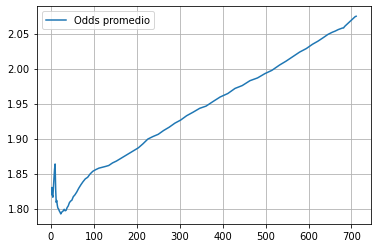

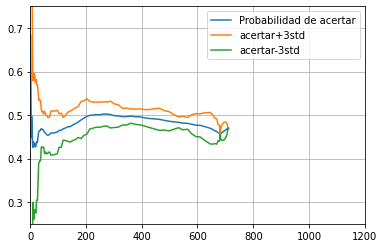

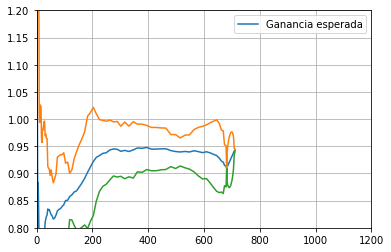

In [ ]:
plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, np.convolve(av_new_Odds_L, np.ones(10), 'valid') / 10)
plt.grid()
plt.legend(['Odds promedio'])

std_temp = []
for i in range(len(new_acc_L)-9):
  std_temp.append(np.std(new_acc_L[i:i+10]))
#plt.plot(new_n_L[5:-4], std_temp)

plt.figure()
plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, np.convolve(new_acc_L, np.ones(10), 'valid') / 10)
plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, np.convolve(new_acc_L, np.ones(10), 'valid') / 10 + np.asarray(std_temp)*3)
plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, np.convolve(new_acc_L, np.ones(10), 'valid') / 10 - np.asarray(std_temp)*3)
plt.grid()
plt.legend(['Probabilidad de acertar','acertar+3std','acertar-3std'])
plt.axis([0, 1200, 0.25, 0.75])

std_temp = []
for i in range(len(new_Profit_L)-9):
  std_temp.append(np.std(new_Profit_L[i:i+10]))

plt.figure()
#plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, (np.convolve(new_acc_L, np.ones(10), 'valid') / 10)*(np.convolve(av_new_Odds_L, np.ones(10), 'valid') / 10))
plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, np.convolve(new_Profit_L, np.ones(10), 'valid') / 10 )
plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, np.convolve(new_Profit_L, np.ones(10), 'valid') / 10 + np.asarray(std_temp)*3)
plt.plot(np.convolve(new_n_L, np.ones(10), 'valid') / 10, np.convolve(new_Profit_L, np.ones(10), 'valid') / 10 - np.asarray(std_temp)*3)
plt.grid()
plt.legend(['Ganancia esperada'])
plt.axis([0, 1200, 0.8, 1.2])


#plt.figure()
#plt.title('Desviación estandar')
#plt.axis([0, 600, 0, 0.05])


(0.0, 1200.0, 0.8, 1.2)

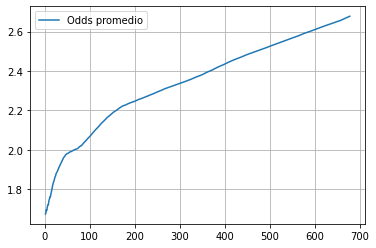

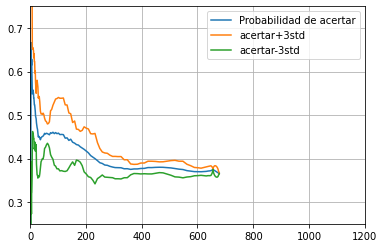

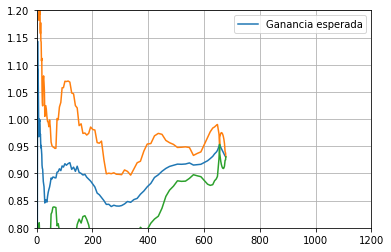

In [ ]:
plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, np.convolve(av_new_Odds_V, np.ones(10), 'valid') / 10)
plt.grid()
plt.legend(['Odds promedio'])

std_temp = []
for i in range(len(new_acc_V)-9):
  std_temp.append(np.std(new_acc_V[i:i+10]))
#plt.plot(new_n_V[5:-4], std_temp)

plt.figure()
plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, np.convolve(new_acc_V, np.ones(10), 'valid') / 10)
plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, np.convolve(new_acc_V, np.ones(10), 'valid') / 10 + np.asarray(std_temp)*3)
plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, np.convolve(new_acc_V, np.ones(10), 'valid') / 10 - np.asarray(std_temp)*3)
plt.grid()
plt.legend(['Probabilidad de acertar','acertar+3std','acertar-3std'])
plt.axis([0, 1200, 0.25, 0.75])

std_temp = []
for i in range(len(new_Profit_V)-9):
  std_temp.append(np.std(new_Profit_V[i:i+10]))

plt.figure()
#plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, (np.convolve(new_acc_V, np.ones(10), 'valid') / 10)*(np.convolve(av_new_Odds_V, np.ones(10), 'valid') / 10))
plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, np.convolve(new_Profit_V, np.ones(10), 'valid') / 10 )
plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, np.convolve(new_Profit_V, np.ones(10), 'valid') / 10 + np.asarray(std_temp)*3)
plt.plot(np.convolve(new_n_V, np.ones(10), 'valid') / 10, np.convolve(new_Profit_V, np.ones(10), 'valid') / 10 - np.asarray(std_temp)*3)
plt.grid()
plt.legend(['Ganancia esperada'])
plt.axis([0, 1200, 0.8, 1.2])

#plt.figure()
#plt.title('Desviación estandar')
#plt.axis([0, 600, 0, 0.05])


In [ ]:
len(np.asarray(std_temp)*3)

2742

In [ ]:
test_y.shape

(2011,)

#TEST

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


acc:  0.48491879350348027
num predicciones:  862
Odds promedio:  2.059953596287703
Profit:  0.973909512761021
acc:  0.4859484777517564
num predicciones:  854
Odds promedio:  2.058091334894614
Profit:  0.9750117096018737
acc:  0.49266503667481665
num predicciones:  818
Odds promedio:  2.053471882640587
Profit:  0.9886919315403423
acc:  0.4905913978494624
num predicciones:  744
Odds promedio:  2.0345295698924732
Profit:  0.978481182795699
acc:  0.49925705794947994
num predicciones:  673
Odds promedio:  2.0120356612184254
Profit:  0.9917830609212482
acc:  0.4957983193277311
num predicciones:  595
Odds promedio:  1.9937647058823529
Profit:  0.9779159663865544
acc:  0.5106382978723404
num predicciones:  517
Odds promedio:  1.9708704061895552
Profit:  0.996615087040619
acc:  0.5150812064965197
num predicciones:  431
Odds promedio:  1.9416937354988402
Profit:  0.9866125290023202
acc:  0.5121951219512195
num predicciones:  369
Odds promedio:  1.9173441734417345
Profit:  0.9668834688346882
acc:

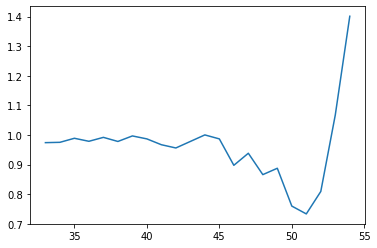

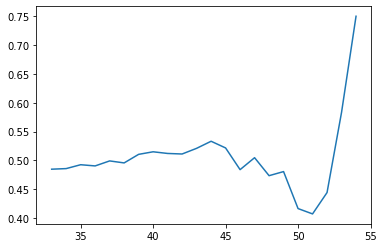

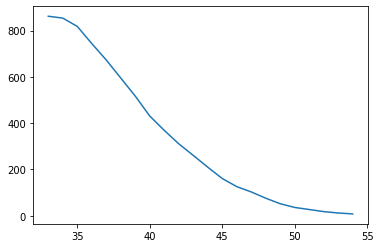

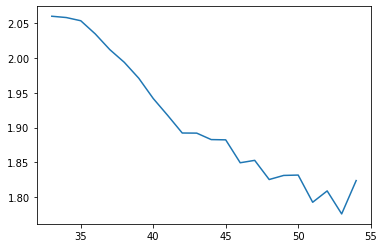

In [ ]:
pf = []
prob =  []
num_p = []
odds_p = []

for T in range(33,55):
  t = T/100  
  index_Pred_L = (model.predict_classes(test_x)==0) & (test_WHH>=1.6) & ( model.predict(test_x)[:,0]> t )
  index_Pred_L_good = (model.predict_classes(test_x)==0) & (test_WHH>=1.6) & (test_y == 0 )  & ( model.predict(test_x)[:,0]> t ) 
  Pred_L_y_mayor_T = model.predict_classes(test_x[index_Pred_L])
  True_labels = test_y[index_Pred_L]
  print('acc: ', accuracy_score( True_labels, Pred_L_y_mayor_T) )
  print('num predicciones: ', np.sum(index_Pred_L) )
  print('Odds promedio: ',np.mean(test_WHH[index_Pred_L]) )
  print('Profit: ',np.sum(test_WHH[index_Pred_L_good])/np.sum(index_Pred_L) )
  pf.append(np.sum(test_WHH[index_Pred_L_good])/np.sum(index_Pred_L))
  prob.append(accuracy_score( True_labels, Pred_L_y_mayor_T) )
  num_p.append(np.sum(index_Pred_L) )
  odds_p.append(np.mean(test_WHH[index_Pred_L]) )


plt.plot(range(33,55),pf)
plt.figure()
plt.plot(range(33,55),prob)
plt.figure()
plt.plot(range(33,55),num_p)
plt.figure()
plt.plot(range(33,55),odds_p)

0.33


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


acc:  0.36529126213592233
num predicciones:  824
Odds promedio:  2.6513592233009713
Profit:  0.8860800970873788
0.34
acc:  0.36887254901960786
num predicciones:  816
Odds promedio:  2.645367647058823
Profit:  0.8947671568627452
0.35
acc:  0.3669250645994832
num predicciones:  774
Odds promedio:  2.6140697674418605
Profit:  0.8779715762273903
0.36
acc:  0.3755274261603376
num predicciones:  711
Odds promedio:  2.5659915611814346
Profit:  0.8879606188466946
0.37
acc:  0.38871951219512196
num predicciones:  656
Odds promedio:  2.5227286585365856
Profit:  0.9096646341463415
0.38
acc:  0.3912310286677909
num predicciones:  593
Odds promedio:  2.4713827993254642
Profit:  0.8977740303541317
0.39
acc:  0.39444444444444443
num predicciones:  540
Odds promedio:  2.440185185185185
Profit:  0.8914629629629629
0.4
acc:  0.39828693790149894
num predicciones:  467
Odds promedio:  2.3814346895074943
Profit:  0.8758458244111349
0.41
acc:  0.4156479217603912
num predicciones:  409
Odds promedio:  2.3320

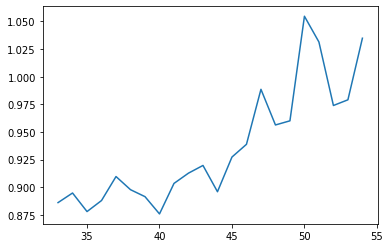

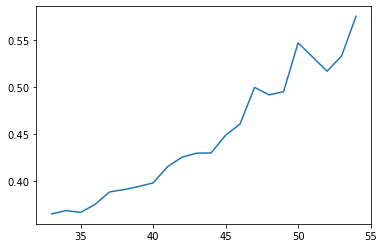

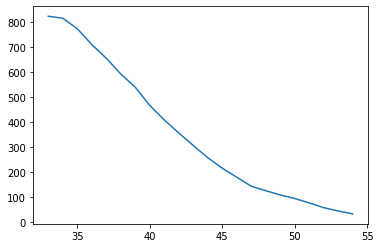

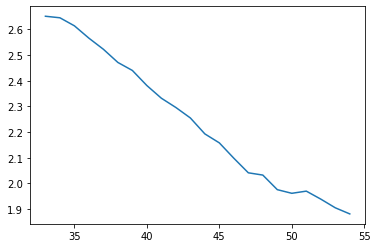

In [ ]:
pf = []
prob =  []
num_p = []
odds_p = []

for T in range(33,55):
  t = T/100
  print(t)
  index_Pred_V = (model.predict_classes(test_x)==2) & (test_WHA>=1.6) & ( model.predict(test_x)[:,2]> t )
  index_Pred_V_good = (model.predict_classes(test_x)==2) & (test_WHA>=1.6) & (test_y == 2 )  & ( model.predict(test_x)[:,2]> t ) 
  Pred_V_y_mayor_T = model.predict_classes(test_x[index_Pred_V])
  True_labels = test_y[index_Pred_V]
  print('acc: ', accuracy_score( True_labels, Pred_V_y_mayor_T) )
  print('num predicciones: ', np.sum(index_Pred_V) )
  print('Odds promedio: ',np.mean(test_WHA[index_Pred_V]) )
  print('Profit: ',np.sum(test_WHA[index_Pred_V_good])/np.sum(index_Pred_V) )

  pf.append(np.sum(test_WHA[index_Pred_V_good])/np.sum(index_Pred_V) )
  prob.append(accuracy_score( True_labels, Pred_V_y_mayor_T) )
  num_p.append( np.sum(index_Pred_V) )
  odds_p.append(np.mean(test_WHA[index_Pred_V]) )

plt.plot(range(33,55),pf)
plt.figure()
plt.plot(range(33,55),prob)
plt.figure()
plt.plot(range(33,55),num_p)
plt.figure()
plt.plot(range(33,55),odds_p)

In [ ]:
#Converts a class vector


if Clases ==4:
  TRAIN_y_cat = transfor4(to_categorical(TRAIN_y,4), alpha=alpha)
  train_y_cat = transfor4(to_categorical(train_y,4), alpha=alpha)
  valid_y_cat = transfor4(to_categorical(valid_y,4), alpha=alpha)
  test_y_cat = transfor4(to_categorical(test_y,4), alpha=alpha)
elif Clases ==3:
  TRAIN_y_cat = to_categorical(TRAIN_y,3)
  train_y_cat = to_categorical(train_y,3)
  valid_y_cat = to_categorical(valid_y,3)
  test_y_cat = to_categorical(test_y,3)


print ("TRAIN_y_cat shape: " + str(TRAIN_y_cat.shape))
print ("train_y_cat shape: " + str(train_y_cat.shape))
print ("valid_y_cat shape: " + str(valid_y_cat.shape))
print ("test_y_cat shape:  " + str(test_y_cat.shape))

TRAIN_y_cat shape: (8042, 3)
train_y_cat shape: (6433, 3)
valid_y_cat shape: (1609, 3)
test_y_cat shape:  (2011, 3)


In [ ]:

class_weights_TRAIN = class_weight.compute_class_weight('balanced',
                                                 np.unique(TRAIN_y),
                                                 TRAIN_y)
#class_weights = np.concatenate((class_weights, [1]), axis = 0) 
# weights_test = {}
# for i in range(len(class_weights)):
#   weights_test[i] = class_weights[i]
# weights_test


In [ ]:
# Creación del modelo
modelo_final = Sequential([
                    Input(shape=[TRAIN_x.shape[-1]]),
                    #Dense(units=Clases, input_shape= [train_x.shape[-1]], activation = softmax, kernel_regularizer= l2(0.001) ),
                    #Dropout(0.25),
                    #Dense(units=10, activation = relu),
                    #Dropout(0.25),
                    Dense(units=Clases, activation = softmax)
                    ])

# Arquitectura del modelo
modelo_final.summary()

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 3)                 141       
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
TRAIN_Weights = (TRAIN_y==0)*class_weights_TRAIN[0]+(TRAIN_y==1)*class_weights_TRAIN[1] + (TRAIN_y==2)*class_weights_TRAIN[2]

test_Weights = (test_y==0)*class_weights_TRAIN[0]+(test_y==1)*class_weights_TRAIN[1] + (test_y==2)*class_weights_TRAIN[2]


In [ ]:
# Definición del optimizador, función de pérdidas y métricas
modelo_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss= 'categorical_crossentropy',metrics=['acc', 'categorical_crossentropy'], weighted_metrics=['acc','categorical_crossentropy'])
# Early stopping
stopping = EarlyStopping(monitor='val_weighted_categorical_crossentropy',min_delta=0,mode='auto',patience=15, restore_best_weights=True)
# Ajuste de pesos
History = modelo_final.fit(TRAIN_x, TRAIN_y_cat, sample_weight= TRAIN_Weights, epochs=250, batch_size=64, callbacks=[stopping] ,validation_data= (test_x, test_y_cat, test_Weights))#, class_weight = weights_test)


Epoch 1/250
126/126 [==============================] - 2s 8ms/step - loss: 1.1575 - acc: 0.3033 - categorical_crossentropy: 1.1629 - weighted_acc: 0.3056 - weighted_categorical_crossentropy: 1.1569 - val_loss: 1.1479 - val_acc: 0.3232 - val_categorical_crossentropy: 1.1537 - val_weighted_acc: 0.3311 - val_weighted_categorical_crossentropy: 1.1447
Epoch 2/250
126/126 [==============================] - 0s 4ms/step - loss: 1.1495 - acc: 0.3047 - categorical_crossentropy: 1.1552 - weighted_acc: 0.3055 - weighted_categorical_crossentropy: 1.1499 - val_loss: 1.1408 - val_acc: 0.3257 - val_categorical_crossentropy: 1.1456 - val_weighted_acc: 0.3336 - val_weighted_categorical_crossentropy: 1.1376
Epoch 3/250
126/126 [==============================] - 0s 4ms/step - loss: 1.1356 - acc: 0.3190 - categorical_crossentropy: 1.1431 - weighted_acc: 0.3206 - weighted_categorical_crossentropy: 1.1389 - val_loss: 1.1343 - val_acc: 0.3262 - val_categorical_crossentropy: 1.1390 - val_weighted_acc: 0.3343 -

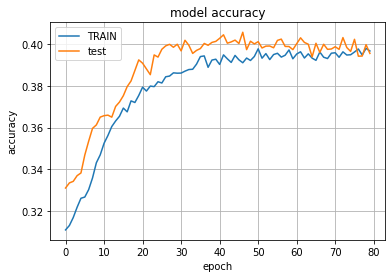

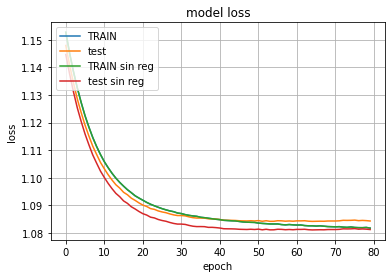

In [ ]:
figure(History,['TRAIN', 'test'])

In [ ]:
# Metricas
Metricas = modelo_final.evaluate(TRAIN_x, TRAIN_y_cat , verbose=0)
print('TRAIN Loss: %.4f, TRAIN Acc: %.4f' % (Metricas[0], Metricas[1]) )
Metricas = modelo_final.evaluate(test_x, test_y_cat , verbose=0)
print('test Loss: %.4f, test Acc: %.4f' % (Metricas[0], Metricas[1]) )

TRAIN Loss: 1.0818, TRAIN Acc: 0.4107
test Loss: 1.0809, test Acc: 0.4092


In [ ]:
confusion_matrix(test_y, model.predict_classes(test_x))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[418, 127, 283],
       [230,  92, 240],
       [214, 106, 301]])

In [ ]:
confusion_matrix(test_y, modelo_final.predict_classes(test_x))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[406, 130, 292],
       [228, 112, 222],
       [213, 103, 305]])

## Predicciones Prob L > T

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


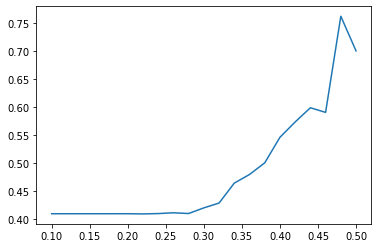

In [ ]:
list_acc= []
umbral = []
for t in range(10, 52, 2):
  T = t/100
  umbral.append(T)
  index_L_mayor_T = model.predict(test_x)[:,0]>T
  Pred_L_mayor_T = model.predict_classes(test_x[index_L_mayor_T])
  True_labels = test_y[index_L_mayor_T]

  list_acc.append(accuracy_score( True_labels, Pred_L_mayor_T) )

plt.plot(umbral,list_acc)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


acc:  0.4793388429752066
num predicciones:  847
Odds promedio:  2.0673907910271545
Profit:  0.9678984651711925
acc:  0.481437125748503
num predicciones:  835
Odds promedio:  2.066994011976048
Profit:  0.972191616766467
acc:  0.48614609571788414
num predicciones:  794
Odds promedio:  2.0600125944584384
Profit:  0.9799370277078087
acc:  0.4860335195530726
num predicciones:  716
Odds promedio:  2.0391340782122906
Profit:  0.969441340782123
acc:  0.49754500818330605
num predicciones:  611
Odds promedio:  2.005040916530278
Profit:  0.9778559738134207
acc:  0.49534450651769085
num predicciones:  537
Odds promedio:  1.9921042830540032
Profit:  0.966536312849162
acc:  0.5124153498871332
num predicciones:  443
Odds promedio:  1.969390519187359
Profit:  0.9938826185101579
acc:  0.5069252077562327
num predicciones:  361
Odds promedio:  1.9409141274238229
Profit:  0.9735734072022162
acc:  0.5190311418685121
num predicciones:  289
Odds promedio:  1.9216608996539792
Profit:  0.9900692041522491
acc: 

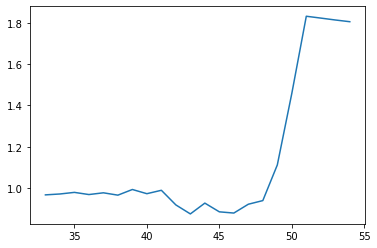

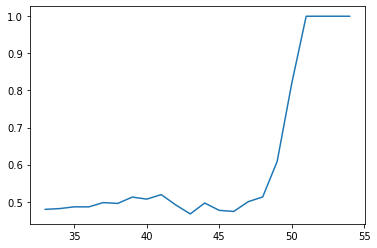

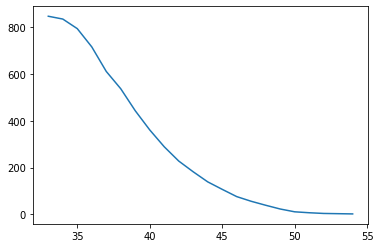

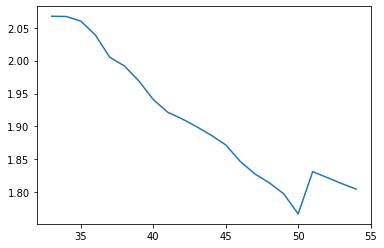

In [ ]:
pf = []
prob =  []
num_p = []
odds_p = []

for T in range(33,55):
  t = T/100

  index_Pred_L = (modelo_final.predict_classes(test_x)==0) & (test_WHH>=1.6) & ( modelo_final.predict(test_x)[:,0]> t )
  index_Pred_L_good = (modelo_final.predict_classes(test_x)==0) & (test_WHH>=1.6) & (test_y == 0 )  & ( modelo_final.predict(test_x)[:,0]> t ) 
  Pred_L_y_mayor_T = modelo_final.predict_classes(test_x[index_Pred_L])
  True_labels = test_y[index_Pred_L]
  print('acc: ', accuracy_score( True_labels, Pred_L_y_mayor_T) )
  print('num predicciones: ', np.sum(index_Pred_L) )
  print('Odds promedio: ',np.mean(test_WHH[index_Pred_L]) )
  print('Profit: ',np.sum(test_WHH[index_Pred_L_good])/np.sum(index_Pred_L) )
  pf.append(np.sum(test_WHH[index_Pred_L_good])/np.sum(index_Pred_L))
  prob.append(accuracy_score( True_labels, Pred_L_y_mayor_T) )
  num_p.append(np.sum(index_Pred_L) )
  odds_p.append(np.mean(test_WHH[index_Pred_L]) )


plt.plot(range(33,55),pf)
plt.figure()
plt.plot(range(33,55),prob)
plt.figure()
plt.plot(range(33,55),num_p)
plt.figure()
plt.plot(range(33,55),odds_p)

In [ ]:
np.sum(modelo_final.predict_classes(test_x)==2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


819

0.33


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


acc:  0.3724053724053724
num predicciones:  819
Odds promedio:  2.662600732600733
Profit:  0.916898656898657
0.34
acc:  0.37407407407407406
num predicciones:  810
Odds promedio:  2.654901234567901
Profit:  0.9188148148148149
0.35
acc:  0.3823915900131406
num predicciones:  761
Odds promedio:  2.616609724047306
Profit:  0.9278055190538764
0.36
acc:  0.39229671897289586
num predicciones:  701
Odds promedio:  2.5561340941512123
Profit:  0.9330385164051356
0.37
acc:  0.40887480190174325
num predicciones:  631
Odds promedio:  2.509492868462758
Profit:  0.9622187004754359
0.38
acc:  0.40545454545454546
num predicciones:  550
Odds promedio:  2.463945454545455
Profit:  0.9364
0.39
acc:  0.4100418410041841
num predicciones:  478
Odds promedio:  2.4187029288702933
Profit:  0.930376569037657
0.4
acc:  0.4229828850855746
num predicciones:  409
Odds promedio:  2.366234718826406
Profit:  0.9432518337408313
0.41
acc:  0.4323529411764706
num predicciones:  340
Odds promedio:  2.3159411764705884
Profit

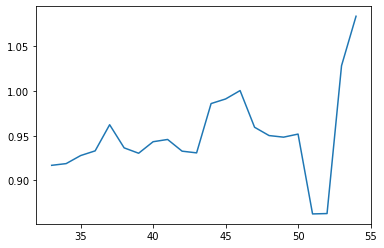

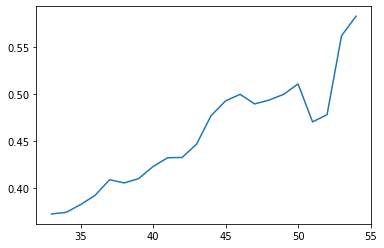

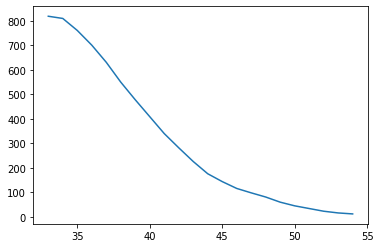

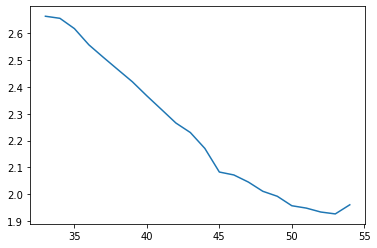

In [ ]:
pf = []
prob =  []
num_p = []
odds_p = []

for T in range(33,55):
  t = T/100
  print(t)
  index_Pred_V = (modelo_final.predict_classes(test_x)==2) & (test_WHA>=1.6) & ( modelo_final.predict(test_x)[:,2]> t )
  index_Pred_V_good = (modelo_final.predict_classes(test_x)==2) & (test_WHA>=1.6) & (test_y == 2 )  & ( modelo_final.predict(test_x)[:,2]> t ) 
  Pred_V_y_mayor_T = modelo_final.predict_classes(test_x[index_Pred_V])
  True_labels = test_y[index_Pred_V]
  print('acc: ', accuracy_score( True_labels, Pred_V_y_mayor_T) )
  print('num predicciones: ', np.sum(index_Pred_V) )
  print('Odds promedio: ',np.mean(test_WHA[index_Pred_V]) )
  print('Profit: ',np.sum(test_WHA[index_Pred_V_good])/np.sum(index_Pred_V) )

  pf.append(np.sum(test_WHA[index_Pred_V_good])/np.sum(index_Pred_V) )
  prob.append(accuracy_score( True_labels, Pred_V_y_mayor_T) )
  num_p.append( np.sum(index_Pred_V) )
  odds_p.append(np.mean(test_WHA[index_Pred_V]) )

plt.plot(range(33,55),pf)
plt.figure()
plt.plot(range(33,55),prob)
plt.figure()
plt.plot(range(33,55),num_p)
plt.figure()
plt.plot(range(33,55),odds_p)

# Opt lr

In [ ]:
#Converts a class vector
#Clases = 4

if Clases ==4:
  TRAIN_y_cat = transfor4(to_categorical(TRAIN_y,4), alpha=alpha)
  train_y_cat = transfor4(to_categorical(train_y,4), alpha=alpha)
  valid_y_cat = transfor4(to_categorical(valid_y,4), alpha=alpha)
  test_y_cat = transfor4(to_categorical(test_y,4), alpha=alpha)
elif Clases ==3:
  TRAIN_y_cat = to_categorical(TRAIN_y,3)
  train_y_cat = to_categorical(train_y,3)
  valid_y_cat = to_categorical(valid_y,3)
  test_y_cat = to_categorical(test_y,3)


print ("TRAIN_y_cat shape: " + str(TRAIN_y_cat.shape))
print ("train_y_cat shape: " + str(train_y_cat.shape))
print ("valid_y_cat shape: " + str(valid_y_cat.shape))
print ("test_y_cat shape:  " + str(test_y_cat.shape))

TRAIN_y_cat shape: (12652, 3)
train_y_cat shape: (10121, 3)
valid_y_cat shape: (2531, 3)
test_y_cat shape:  (3163, 3)


In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
lambda epoch: 1e-5 * 10**(epoch / 20))

In [ ]:
model.set_weights(Wsave)

# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['acc'])
# Ajuste de pesos
history_lr = model.fit(train_x, train_y_cat, sample_weight=train_Weights, epochs=100, batch_size=64, validation_data= (valid_x, valid_y_cat, valid_Weights), callbacks=[lr_schedule])#, class_weight = weights_train)


Epoch 1/100
159/159 [==============================] - 1s 5ms/step - loss: 1.1257 - acc: 0.3734 - val_loss: 1.1215 - val_acc: 0.3750
Epoch 2/100
159/159 [==============================] - 0s 3ms/step - loss: 1.1274 - acc: 0.3639 - val_loss: 1.1199 - val_acc: 0.3730
Epoch 3/100
159/159 [==============================] - 0s 3ms/step - loss: 1.1302 - acc: 0.3630 - val_loss: 1.1182 - val_acc: 0.3718
Epoch 4/100
159/159 [==============================] - 0s 3ms/step - loss: 1.1276 - acc: 0.3664 - val_loss: 1.1166 - val_acc: 0.3742
Epoch 5/100
159/159 [==============================] - 0s 3ms/step - loss: 1.1257 - acc: 0.3616 - val_loss: 1.1151 - val_acc: 0.3726
Epoch 6/100
159/159 [==============================] - 0s 3ms/step - loss: 1.1208 - acc: 0.3600 - val_loss: 1.1135 - val_acc: 0.3718
Epoch 7/100
159/159 [==============================] - 0s 3ms/step - loss: 1.1201 - acc: 0.3624 - val_loss: 1.1122 - val_acc: 0.3686
Epoch 8/100
159/159 [==============================] - 0s 3ms/step - 

(0.0001, 0.1, 1.0, 1.2)

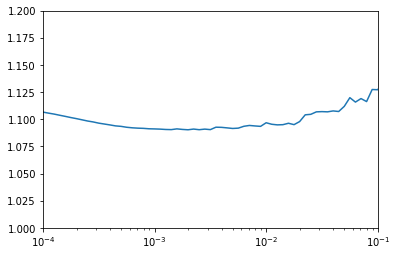

In [ ]:
plt.semilogx(history_lr.history["lr"], history_lr.history["loss"])
plt.axis([1e-4, 1e-1, 1.0, 1.2])


In [ ]:
#############   CREATE IF DOES'NT EXIST   #############
###################### SAVE MODEL #####################
modelo_final.save('./content/modelo.h5')
modelo_final.save_weights('./content/pesos.h5')